# Zeta Function Notebook
The purpose of this notebook is to act as a sandbox for generating the Zeta function of a time series. 

In [1]:
# First we need to import the necessary libraries. 
# Pyspedas handles loading the data, while MFDFA handles fluctuation function calculation
import pyspedas
import matplotlib.pyplot as plt
import numpy as np
from pytplot import tplot
import MFDFAlib
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

20-May-25 13:35:27: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
20-May-25 13:35:27: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf
20-May-25 13:35:31: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
20-May-25 13:35:32: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf


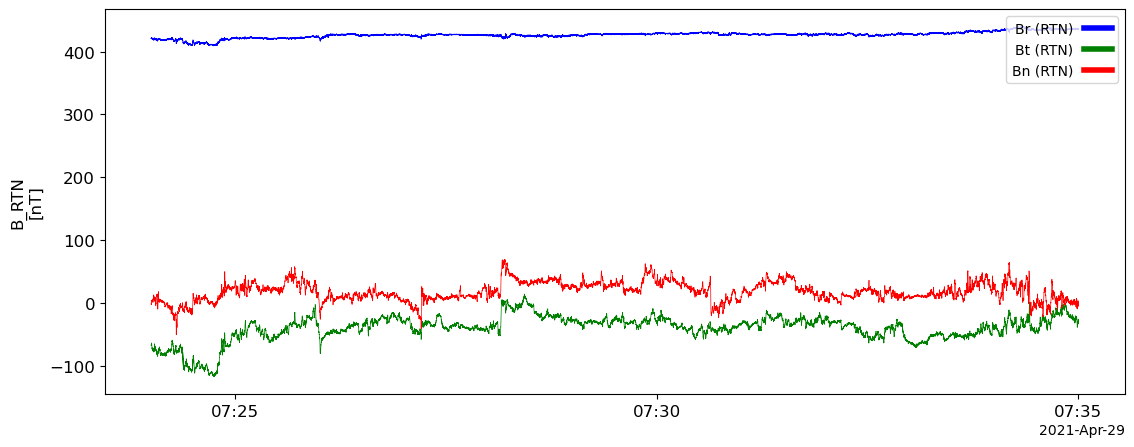

20-May-25 13:35:33: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
20-May-25 13:35:33: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf
20-May-25 13:35:37: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
20-May-25 13:35:38: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf


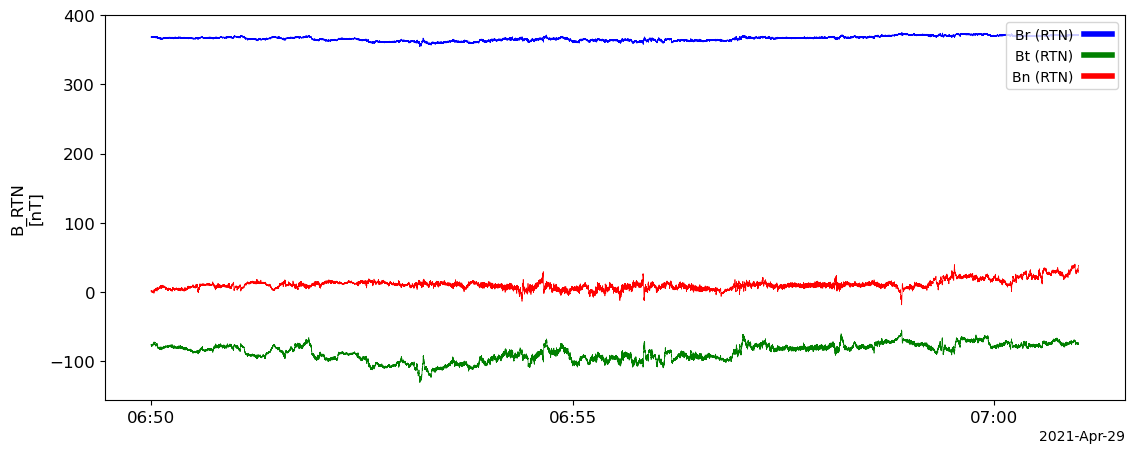

In [4]:
# First let's load the sub-Alfvenic time range
# Ranges taken from https://arxiv.org/pdf/2201.10718 Section 3
subAlfTimeRange = ['2021-4-29/07:24','2021-4-29/07:35']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=subAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_subAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_sub = MFDFAlib.magnitude(b_rtn_subAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFA = MFDFAlib.MFDFA_analysis(bmag_sub)

# Now let's choose the corresponding super-Alfvenic time range
superAlfTimeRange = ['2021-4-29/06:50','2021-4-29/07:01']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=superAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_superAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_super = MFDFAlib.magnitude(b_rtn_superAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

sub_label = 'Sub-Alfvenic Interval (April 29th, 2021 from 07:24-07:35 UTC)'
super_label = 'Super-Alfvenic Interval (April 29th, 2021 from 06:50-07:01 UTC)'

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFAb = MFDFAlib.MFDFA_analysis(bmag_sub, bmag_super, sub_label, super_label)

## Introduction to the Zeta Function

First we start with the structure function for the B-field magnitude data:
$$
S_p(\tau) = \langle [|\vec{B}(t+\tau)|-|\vec{B}(t)|]^p \rangle
$$


This function represents how the average of pth power of absolute differences between two points in a signal scales with lag.

In [5]:
# This is a function to calculate the lagged difference between B-field magnitude values
# (Essentially this performs the operation inside the square brackets in the above equation)
def lagged_difference(bmag, lag):
    diff_list = []
    for t in range(len(bmag)-1):
        if t + lag <= len(bmag)-1:
            diff_list.append(np.abs(bmag[t+lag]-bmag[t]))
        else: break
    return np.array(diff_list)

In [6]:
# This function will implement a calculation of the structure function:
def structure_function(bmag, plist,lags):
    # The structure of this array will be [[S_p1(Tau_1), S_p1(Tau_2), S_p1(Tau_3),...],[S_p2(Tau_1), S_p2(Tau_2), S_p2(Tau_3),...],...]
    strucArray = np.zeros((len(plist),len(lags)))
    
    # Set up plot
    fig, ax = plt.subplots()

    for lag in lags:
        lag_diff = lagged_difference(bmag, lag)
        for p in range(len(plist)):
            strucArray[p-1][lag-1] = np.mean(lag_diff**p) 

    for p in range(len(strucArray)):
        pArray = np.full(len(lags),plist[p])
        sc = ax.scatter(np.log(lags),np.log(strucArray[p]), c = pArray, s = 8, cmap = 'RdGy', vmin = -20,vmax = 20)    
    
    cbar = plt.colorbar(sc)
    cbar.set_label('Order p')
    ax = plt.gca()
    ax.set_facecolor("black")
    plt.xlabel(r'$\log{\tau}$')
    plt.ylabel(r'$\log{S_p(\tau)}$')
    plt.title(r'$p$th-Order Structure Function $S_p(\tau)$ vs. Lag $\tau$ (Log-Scale)')
    plt.show()


    return strucArray

In [12]:
plist = np.arange(-20,20+1,0.25)
lag1 = np.arange(10,len(bmag_sub)//2)
lag2 = np.arange(10,len(bmag_super)//2)


KeyboardInterrupt: 

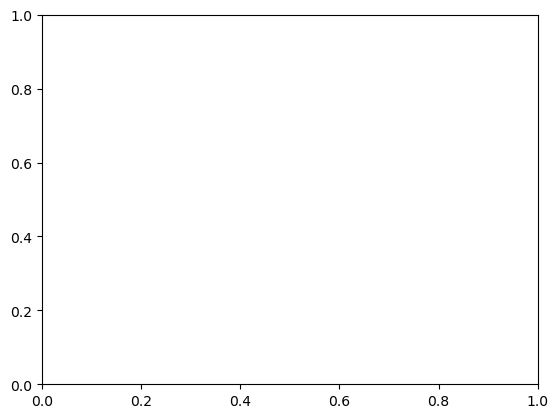

In [13]:
structure_function(bmag_sub, plist, lag1)
structure_function(bmag_super, plist, lag2)